In [1]:
#Import Librarires


#matrix algebra and dataframe
import pandas as pd
import numpy as np

#Visulization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer


#sampling and validating
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

#Algorithms

#dummy classifier
from sklearn.dummy import DummyClassifier

#Probabilistic algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

#Non-Linear
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Clasiification and Regression Tree
from sklearn.tree import DecisionTreeClassifier

#Ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#Xtreme Gradient Boost
from xgboost import XGBClassifier

#Pipeline, list tuples (list of transformations in a sequence order with final estimator)
from sklearn.pipeline import Pipeline

#metrics
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#Imbalanced learning Library

#Oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN

#Undersampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks

#combined sampling
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

#ensemble algorithms from imbalanced learning
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

#this is the pipeline to use with Sampling algorithms
from imblearn.pipeline import Pipeline as imb_pipe


#Special type of container .Counter will identify the label as key and number of observations as value (in target variable)
from collections import Counter

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset as pandas dataframe
df=pd.read_csv('Desktop/stddatasets/mammography.csv',header=None,names=['Object_Area','Average_GreyLevel','Grad_Strength','Noise_Fluctuation','Contrast','Shape_Des','Microcalcifications'])

In [3]:
df.head()

,Object_Area,Average_GreyLevel,Grad_Strength,Noise_Fluctuation,Contrast,Shape_Des,Microcalcifications
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,'-1'
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,'-1'
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,'-1'
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,'-1'
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,'-1'


In [4]:
df.describe()

,Object_Area,Average_GreyLevel,Grad_Strength,Noise_Fluctuation,Contrast,Shape_Des
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04
mean,1.096536e-10,1.297595e-09,5.698113e-10,-2.435706e-09,-1.120680e-09,1.459483e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01,1.016613e+00
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01,1.949027e+00


In [5]:
df.isnull().sum()

Object_Area            0
Average_GreyLevel      0
Grad_Strength          0
Noise_Fluctuation      0
Contrast               0
Shape_Des              0
Microcalcifications    0
dtype: int64

In [6]:
df.shape

(11183, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11183 entries, 0 to 11182
Data columns (total 7 columns):
Object_Area            11183 non-null float64
Average_GreyLevel      11183 non-null float64
Grad_Strength          11183 non-null float64
Noise_Fluctuation      11183 non-null float64
Contrast               11183 non-null float64
Shape_Des              11183 non-null float64
Microcalcifications    11183 non-null object
dtypes: float64(6), object(1)
memory usage: 611.6+ KB


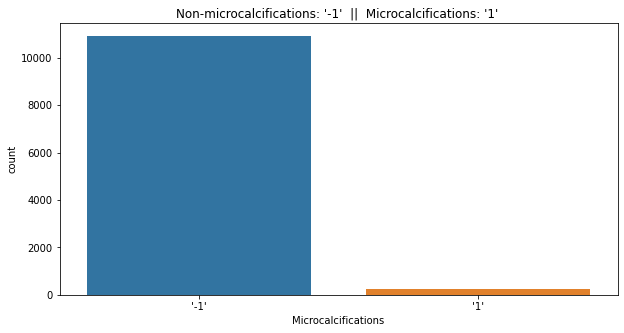

In [8]:
#Skewed class distribution
plt.figure(figsize=(10,5));
sns.countplot(x='Microcalcifications',data=df);
plt.title("Non-microcalcifications: '-1'  ||  Microcalcifications: '1' ");

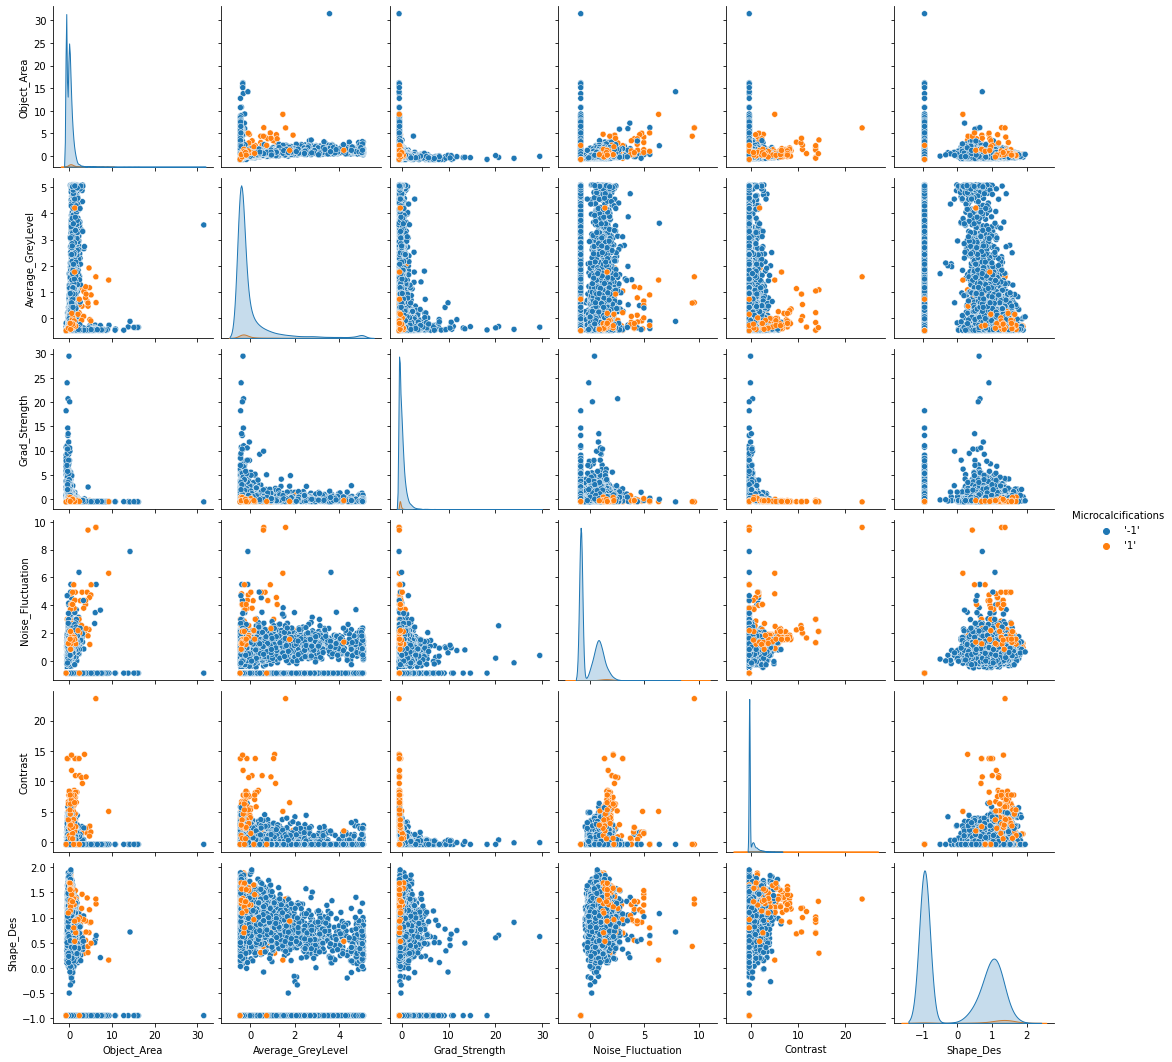

In [9]:
#Variables distribution 
sns.pairplot(data=df,hue='Microcalcifications');

In [10]:
#Split dataframe to numpy arrays as predictor and target variables
X,y=df.values[:,0:-1],df.values[:,-1]

In [11]:
#encode target variable ('-1', '1') into (0,1)
encoder=LabelEncoder()
encoder.fit(y)
encoded_y=encoder.transform(y)

In [12]:
# random_state seed
rs=1

# train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.10,shuffle=True,stratify=y,random_state=rs)

In [14]:
#ensure that class distrubution of train and test data
dict_y={'target_variable':encoded_y,'y_train':y_train,'y_test':y_test}

for i,v in dict_y.items():
    print(i)
    target=v
    counter=Counter(target)
    for k,v in counter.items():
        per=v/len(target)*100
        print("Class:%d Counts:%d Percentage:%.3f%%"%(k,v,per))
    print('------')

target_variable
Class:0 Counts:10923 Percentage:97.675%
Class:1 Counts:260 Percentage:2.325%
------
y_train
Class:0 Counts:9830 Percentage:97.675%
Class:1 Counts:234 Percentage:2.325%
------
y_test
Class:0 Counts:1093 Percentage:97.676%
Class:1 Counts:26 Percentage:2.324%
------


In [15]:
def plot_datasets(X,y,title):
    n_classes=len(np.unique(y))
    plt.figure(figsize=(12,6))
    sns.scatterplot(X[:,1],X[:,2],y);
    title=title+' Skewed Class Distrinbution in Scatterplot'
    plt.title(title,fontsize=16)
    plt.xlabel('Average_GreyLevel',fontsize=12)
    plt.ylabel('Grad_Strength',fontsize=12)
    plt.legend()

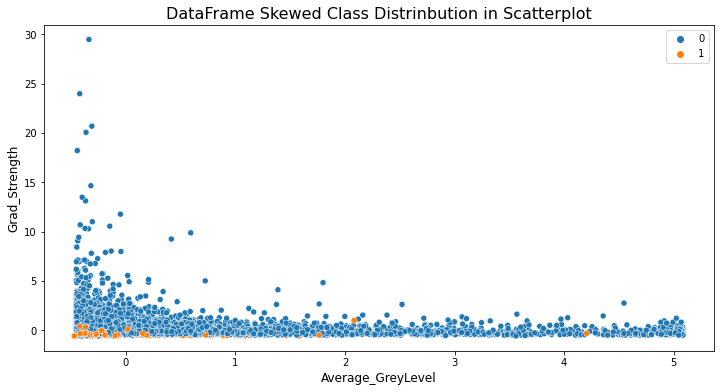

In [16]:
title='DataFrame'
plot_datasets(X,encoded_y,title)

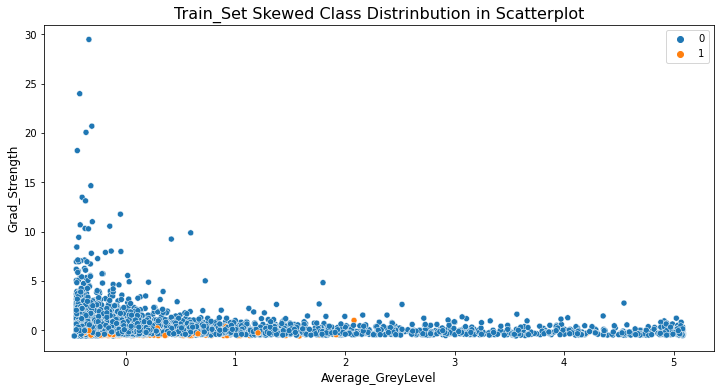

In [17]:
title='Train_Set'
plot_datasets(X_train,y_train,title)

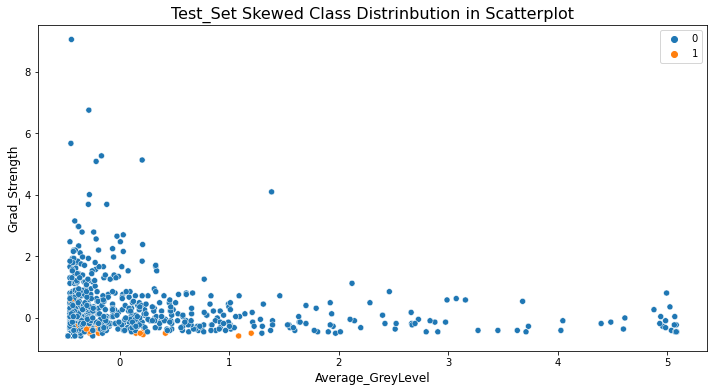

In [18]:
title='Test_Set'
plot_datasets(X_test,y_test,title)

# function evaluate a model

In [19]:
def evaluate_model(X,y,model):
    kfold=RepeatedStratifiedKFold(n_splits=15,n_repeats=3,random_state=rs)
    scores=cross_val_score(model,X,y,scoring='roc_auc',cv=kfold,n_jobs=-1)
    return scores

# reference model

In [20]:
model=DummyClassifier(strategy='stratified',random_state=rs)
scores=evaluate_model(X_train,y_train,model)
print("Mean ROC_AUC: %.3f, (%.3f)"%(scores.mean(),scores.std()))

Mean ROC_AUC: 0.496, (0.012)


In [21]:
#function to plot boxplot for cross_validation score distribution
def crossval_boxplot(result_list,model_names,title):
    data=np.array(result_list).transpose()
    res=pd.DataFrame(data=data,columns=model_names)
    plt.figure(figsize=(14,6));
    ax=sns.boxplot(data=res,showmeans=True,meanprops={"markerfacecolor": "white","markeredgecolor": "white"});
    title=title+' models ROC_AUC score Distribution'
    plt.xlabel('Models',fontsize=14)
    plt.ylabel('ROC_AUC_SCORE',fontsize=14)
    plt.title(title,fontsize=18)

# probabilistic, non-linear models

In [22]:
def prob_nonlin_models():
    
    models,names=list(),list()
    
    models.append(LogisticRegression(solver='lbfgs'))
    names.append("LR")
    
    models.append(LinearDiscriminantAnalysis())
    names.append("LDA")

    models.append(QuadraticDiscriminantAnalysis())
    names.append("QDA")
    
    models.append(GaussianNB())
    names.append("Gaussian")

    models.append(SVC(gamma='scale'))
    names.append("SVM")

    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    return models,names

In [23]:
prob_models,prob_names=prob_nonlin_models()
prob_results=list()

In [24]:
prob_models,prob_names=prob_nonlin_models()
prob_results=list()
for i in range(len(prob_models)):
    pipe=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('m',prob_models[i])])
    scores=evaluate_model(X_train,y_train,pipe)
    prob_results.append(scores)
    print(">>%-10s, Mean ROC_AUC: %.3f, (%.3f)"%(prob_names[i],scores.mean(),scores.std()))

>>LR        , Mean ROC_AUC: 0.917, (0.045)
>>LDA       , Mean ROC_AUC: 0.917, (0.039)
>>QDA       , Mean ROC_AUC: 0.912, (0.039)
>>Gaussian  , Mean ROC_AUC: 0.905, (0.043)
>>SVM       , Mean ROC_AUC: 0.889, (0.065)
>>KNN       , Mean ROC_AUC: 0.863, (0.061)


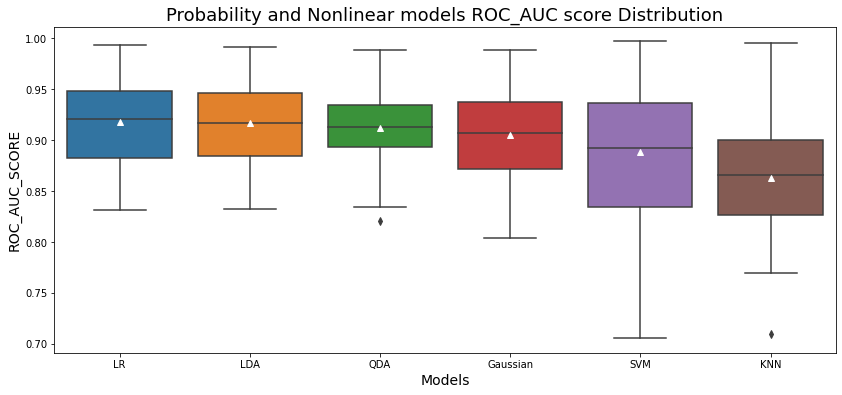

In [25]:
title='Probability and Nonlinear'
crossval_boxplot(prob_results,prob_names,title)

In [26]:
penalty=['l1', 'l2', 'elasticnet', 'none']
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C=[0.1,0.25,.5,.75,1]

lr_model=LogisticRegression()
lr_pipe=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('lr',lr_model)])

lr_params=dict()
lr_params['lr__penalty']=penalty
lr_params['lr__solver']=solver
lr_params['lr__C']=C
kfold=RepeatedStratifiedKFold(n_splits=15,n_repeats=3,random_state=rs)
lr_grid=GridSearchCV(lr_pipe,lr_params,scoring='roc_auc',n_jobs=-1,cv=kfold)
lr_grid.fit(X_train,y_train)
print('Best Mean ROC AUC: %.3f' % lr_grid.best_score_)
print('Best Config: %s' % lr_grid.best_params_)

Best Mean ROC AUC: 0.918
Best Config: {'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}


In [27]:
C=[0.1,0.25,.5,.75,1]
kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
gamma=['scale', 'auto']

svm_model=SVC()
svm_pipe=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('svm',svm_model)])

svm_params=dict()
svm_params['svm__C']=C
svm_params['svm__kernel']=kernel
svm_params['svm__gamma']=gamma
kfold=RepeatedStratifiedKFold(n_splits=15,n_repeats=3,random_state=rs)
svm_grid=GridSearchCV(svm_pipe,svm_params,scoring='roc_auc',n_jobs=-1,cv=kfold)
svm_grid.fit(X_train,y_train)
print('Best Mean ROC AUC: %.3f' % svm_grid.best_score_)
print('Best Config: %s' % svm_grid.best_params_)

Best Mean ROC AUC: 0.896
Best Config: {'svm__C': 0.75, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [28]:
n_neighbors=[3,5,7,9,11]
weights=['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

knn_model=KNeighborsClassifier()
knn_pipe=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('knn',knn_model)])

knn_params=dict()
knn_params['knn__n_neighbors']=n_neighbors
knn_params['knn__weights']=weights
knn_params['knn__algorithm']=algorithm
kfold=RepeatedStratifiedKFold(n_splits=15,n_repeats=3,random_state=rs)
knn_grid=GridSearchCV(knn_pipe,knn_params,scoring='roc_auc',n_jobs=-1,cv=kfold)
knn_grid.fit(X_train,y_train)
print('Best Mean ROC AUC: %.3f' % knn_grid.best_score_)
print('Best Config: %s' % knn_grid.best_params_)

Best Mean ROC AUC: 0.913
Best Config: {'knn__algorithm': 'brute', 'knn__n_neighbors': 11, 'knn__weights': 'distance'}


# cart , ensemble and xgboost models

In [29]:
def cart_ensemble_xgboost_models():
    models,names=list(),list()
    
    models.append(DecisionTreeClassifier())
    names.append("CART")
    
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append("RF")
    
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append("ET")

    models.append(BaggingClassifier(n_estimators=1000))
    names.append("Bagging")
    
    models.append(GradientBoostingClassifier(n_estimators=1000))
    names.append("GB")

    models.append(AdaBoostClassifier(n_estimators=1000))
    names.append("AdaBoost")

    models.append(XGBClassifier(n_estimators=1000))
    names.append("XGBOOST")

    return models,names

In [32]:
ensemble_models,ensemble_names=cart_ensemble_xgboost_models()
cart_ensemble_results=list()
for i in range(len(ensemble_models)):
    pipe=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('m',ensemble_models[i])])
    scores=evaluate_model(X_train,y_train,pipe)
    cart_ensemble_results.append(scores)
    print(">>%-10s, Mean ROC_AUC: %.3f, (%.3f)"%(ensemble_names[i],scores.mean(),scores.std()))

>>CART      , Mean ROC_AUC: 0.742, (0.088)
>>RF        , Mean ROC_AUC: 0.948, (0.031)
>>ET        , Mean ROC_AUC: 0.946, (0.036)
>>Bagging   , Mean ROC_AUC: 0.935, (0.037)
>>GB        , Mean ROC_AUC: 0.914, (0.048)
>>AdaBoost  , Mean ROC_AUC: 0.895, (0.054)
>>XGBOOST   , Mean ROC_AUC: 0.922, (0.042)


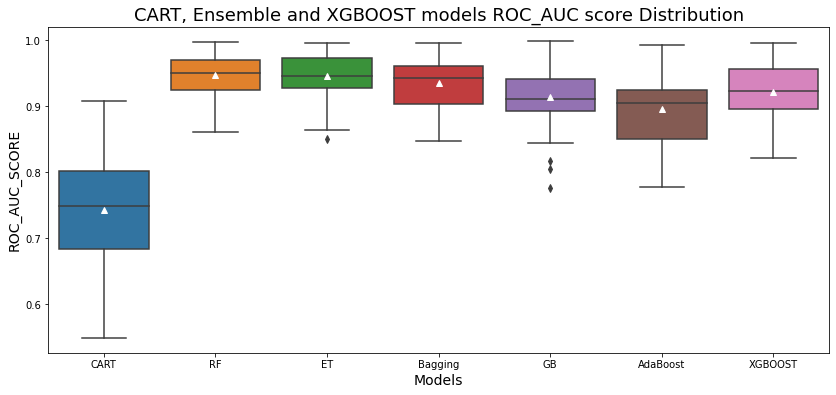

In [33]:
title='CART, Ensemble and XGBOOST'
crossval_boxplot(cart_ensemble_results,ensemble_names,title)

In [34]:
n_estimator=[100,500,1000,1500,2000]

rf_model=RandomForestClassifier()
rf_pipe=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('rf',rf_model)])

rf_params=dict()
rf_params['rf__n_estimators']=n_estimator

kfold=RepeatedStratifiedKFold(n_splits=15,n_repeats=3,random_state=rs)
rf_grid=GridSearchCV(rf_pipe,rf_params,scoring='roc_auc',n_jobs=-1,cv=kfold)
rf_grid.fit(X_train,y_train)
print('Best Mean ROC AUC: %.3f' % rf_grid.best_score_)
print('Best Config: %s' % rf_grid.best_params_)

Best Mean ROC AUC: 0.947
Best Config: {'rf__n_estimators': 1500}


In [35]:
n_estimator=[100,500,1000,1500,2000]
et_model=ExtraTreesClassifier()
et_pipe=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('et',et_model)])

et_params=dict()
et_params['et__n_estimators']=n_estimator
kfold=RepeatedStratifiedKFold(n_splits=15,n_repeats=3,random_state=rs)
et_grid=GridSearchCV(et_pipe,et_params,scoring='roc_auc',n_jobs=-1,cv=kfold)
et_grid.fit(X_train,y_train)
print('Best Mean ROC AUC: %.3f' % et_grid.best_score_)
print('Best Config: %s' % et_grid.best_params_)

Best Mean ROC AUC: 0.946
Best Config: {'et__n_estimators': 2000}


# Consensitive algorithms

In [36]:
def costsensitive_models():
    models,names=list(),list()
    
    models.append(LogisticRegression(class_weight='balanced'))
    names.append("LR+Balanced")
    
    models.append(DecisionTreeClassifier(class_weight='balanced'))
    names.append("CART+Balanced")
    
    models.append(SVC(class_weight='balanced'))
    names.append("SVM+Balanced")
    
    models.append(RandomForestClassifier(n_estimators=1000,class_weight='balanced'))
    names.append('RF+Balanced')
    
    #scale_pos_weight=ratio between no_of_negative_class(9830) and no_of_positive_class(234)
    models.append(XGBClassifier(n_estimators=1000,scale_pos_weight=42))
    names.append("XGB+Balanced")
    
    return models,names

In [37]:
cost_models,cost_names=costsensitive_models()
costsensitive_results=list()
for i in range(len(cost_models)):
    pipe=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('m',cost_models[i])])
    scores=evaluate_model(X_train,y_train,pipe)
    costsensitive_results.append(scores)
    print(">>%-15s, Mean ROC_AUC: %.3f, (%.3f)"%(cost_names[i],scores.mean(),scores.std()))

>>LR+Balanced    , Mean ROC_AUC: 0.919, (0.040)
>>CART+Balanced  , Mean ROC_AUC: 0.719, (0.080)
>>SVM+Balanced   , Mean ROC_AUC: 0.957, (0.028)
>>RF+Balanced    , Mean ROC_AUC: 0.919, (0.046)
>>XGB+Balanced   , Mean ROC_AUC: 0.895, (0.051)


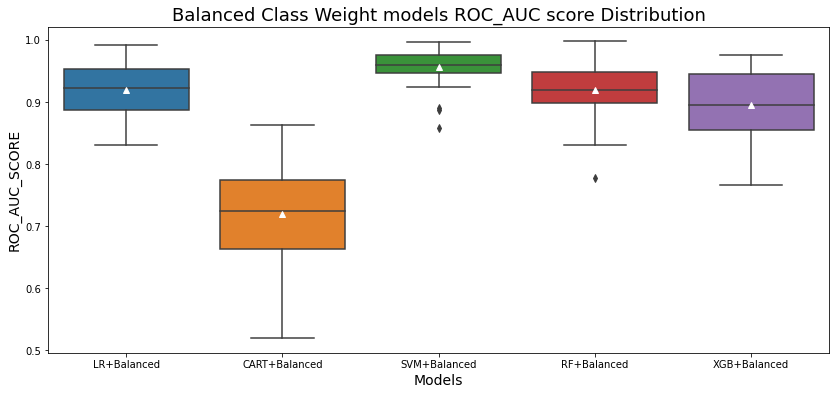

In [38]:
title='Balanced Class Weight'
crossval_boxplot(costsensitive_results,cost_names,title)

In [39]:
penalty=['l1', 'l2', 'elasticnet']
solver=[ 'lbfgs', 'liblinear', 'sag', 'saga']
C=[0.1,0.25,.5,.75,1]

lrbalanced_model=LogisticRegression(class_weight='balanced')
lrbl_pipe=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('lrbl',lrbalanced_model)])

lrbl_params=dict()
lrbl_params['lrbl__penalty']=penalty
lrbl_params['lrbl__solver']=solver
lrbl_params['lrbl__C']=C
kfold=RepeatedStratifiedKFold(n_splits=15,n_repeats=3,random_state=rs)
lrbl_grid=GridSearchCV(lrbl_pipe,lrbl_params,scoring='roc_auc',n_jobs=-1,cv=kfold)
lrbl_grid.fit(X_train,y_train)
print('Best Mean ROC AUC: %.3f' % lrbl_grid.best_score_)
print('Best Config: %s' % lrbl_grid.best_params_)

Best Mean ROC AUC: 0.919
Best Config: {'lrbl__C': 0.1, 'lrbl__penalty': 'l2', 'lrbl__solver': 'lbfgs'}


In [40]:
C=[0.1,0.25,.5,.75,1]
kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
gamma=['scale', 'auto']

svmbl_model=SVC(class_weight='balanced')
svmbl_pipe=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('svmbl',svmbl_model)])

svmbl_params=dict()
svmbl_params['svmbl__C']=C
svmbl_params['svmbl__kernel']=kernel
svmbl_params['svmbl__gamma']=gamma
kfold=RepeatedStratifiedKFold(n_splits=15,n_repeats=3,random_state=rs)
svmbl_grid=GridSearchCV(svmbl_pipe,svmbl_params,scoring='roc_auc',n_jobs=-1,cv=kfold)
svmbl_grid.fit(X_train,y_train)
print('Best Mean ROC AUC: %.3f' % svmbl_grid.best_score_)
print('Best Config: %s' % svmbl_grid.best_params_)

Best Mean ROC AUC: 0.957
Best Config: {'svmbl__C': 0.25, 'svmbl__gamma': 'auto', 'svmbl__kernel': 'rbf'}


# ensemble from imbalanced learning library

In [41]:
def imb_ensemble_models():
    models,names=list(),list()
    
    models.append(BalancedBaggingClassifier(n_estimators=1000))
    names.append("Balanced_Bagging")
    
    models.append(BalancedRandomForestClassifier(n_estimators=1000))
    names.append("Balanced_RF")

    models.append(EasyEnsembleClassifier(n_estimators=1000))
    names.append("Easy_Ensemble")
    
    models.append(RUSBoostClassifier(n_estimators=1000))
    names.append("RUS_Boost")

    return models,names

In [42]:
imb_models,imb_names=imb_ensemble_models()
imb_ensemble_results=list()
for i in range(len(imb_models)):
    pipe=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('m',imb_models[i])])
    scores=evaluate_model(X_train,y_train,pipe)
    imb_ensemble_results.append(scores)
    print(">>%-18s, Mean ROC_AUC: %.3f, (%.3f)"%(imb_names[i],scores.mean(),scores.std()))

>>Balanced_Bagging  , Mean ROC_AUC: 0.945, (0.035)
>>Balanced_RF       , Mean ROC_AUC: 0.951, (0.032)
>>Easy_Ensemble     , Mean ROC_AUC: 0.927, (0.045)
>>RUS_Boost         , Mean ROC_AUC: 0.774, (0.084)


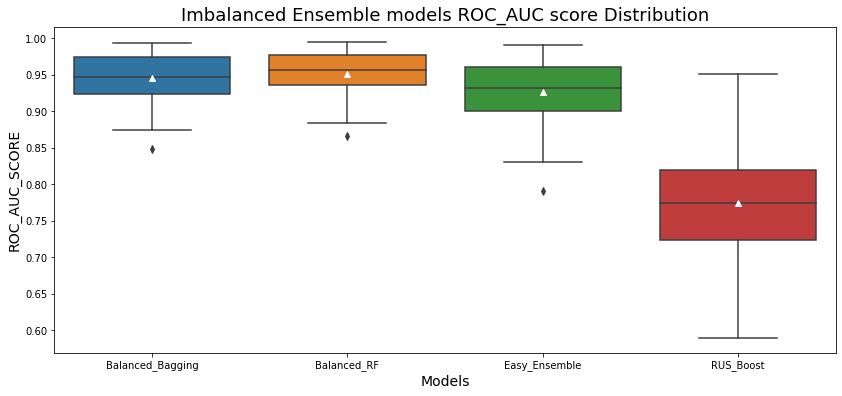

In [43]:
title='Imbalanced Ensemble'
crossval_boxplot(imb_ensemble_results,imb_names,title)

# Oversampling Models

In [44]:
def oversampling_models():
    models,names=list(),list()
    
    models.append(RandomOverSampler())
    names.append("Ran_OverSampling")
    
    models.append(SMOTE())
    names.append("SMOTE")

    models.append(BorderlineSMOTE())
    names.append("Border_SMOTE")
    
    models.append(SVMSMOTE())
    names.append("SVM_SMOTE")
    
    models.append(ADASYN())
    names.append("ADASYN")
    
    return models,names

In [45]:
os_models,os_names=oversampling_models()
oversampling_results=list()
for i in range(len(os_models)):
    pipe=imb_pipe([('s',StandardScaler()),('pt',PowerTransformer()),('m',os_models[i]),('RF',RandomForestClassifier(n_estimators=1000))])
    scores=evaluate_model(X_train,y_train,pipe)
    oversampling_results.append(scores)
    print(">>%-18s, Mean ROC_AUC: %.3f, (%.3f)"%(os_names[i],scores.mean(),scores.std()))

>>Ran_OverSampling  , Mean ROC_AUC: 0.924, (0.041)
>>SMOTE             , Mean ROC_AUC: 0.947, (0.035)
>>Border_SMOTE      , Mean ROC_AUC: 0.941, (0.042)
>>SVM_SMOTE         , Mean ROC_AUC: 0.949, (0.034)
>>ADASYN            , Mean ROC_AUC: 0.939, (0.034)


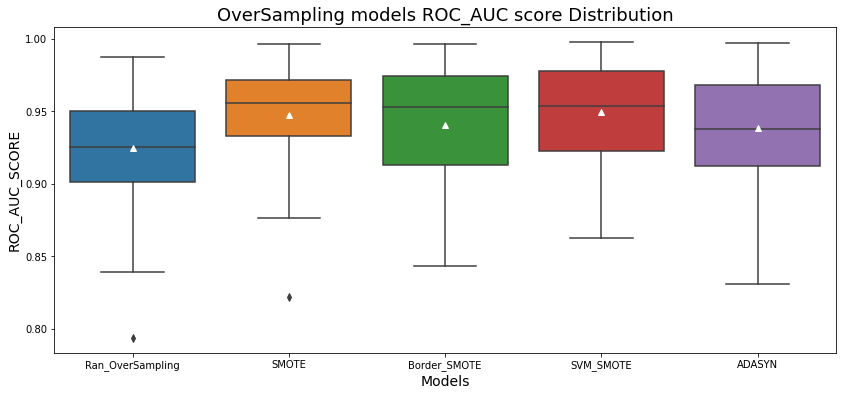

In [46]:
title='OverSampling'
crossval_boxplot(oversampling_results,os_names,title)

# Undersampling Models

In [47]:
def undersampling_models():
    models,names=list(),list()
    
    models.append(RandomUnderSampler())
    names.append("RanUS")
    
    models.append(NeighbourhoodCleaningRule())
    names.append("NCR")

    models.append(CondensedNearestNeighbour())
    names.append("CNN")
    
    models.append(EditedNearestNeighbours())
    names.append("ENN")
    
    models.append(OneSidedSelection())
    names.append("OSS")
    
    models.append(RepeatedEditedNearestNeighbours())
    names.append("RENN")
    
    models.append(TomekLinks())
    names.append("TL")
    
    models.append(NearMiss(version=1,n_neighbors=3))
    names.append("NM1")
    
    models.append(NearMiss(version=2,n_neighbors=3))
    names.append("NM2")
    
    models.append(NearMiss(version=3,n_neighbors_ver3=3))
    names.append("NM3")   

    return models,names

In [48]:
us_models,us_names=undersampling_models()
undersampling_results=list()
for i in range(len(us_models)):
    pipe=imb_pipe([('s',StandardScaler()),('pt',PowerTransformer()),('m',us_models[i]),('RF',RandomForestClassifier(n_estimators=1000))])
    scores=evaluate_model(X_train,y_train,pipe)
    undersampling_results.append(scores)
    print(">>%-8s, Mean ROC_AUC: %.3f, (%.3f)"%(us_names[i],scores.mean(),scores.std()))

>>RanUS   , Mean ROC_AUC: 0.946, (0.032)
>>NCR     , Mean ROC_AUC: 0.947, (0.032)
>>CNN     , Mean ROC_AUC: 0.943, (0.034)
>>ENN     , Mean ROC_AUC: 0.946, (0.033)
>>OSS     , Mean ROC_AUC: 0.885, (0.100)
>>RENN    , Mean ROC_AUC: 0.946, (0.034)
>>TL      , Mean ROC_AUC: 0.947, (0.034)
>>NM1     , Mean ROC_AUC: 0.686, (0.028)
>>NM2     , Mean ROC_AUC: 0.593, (0.049)
>>NM3     , Mean ROC_AUC: 0.648, (0.037)


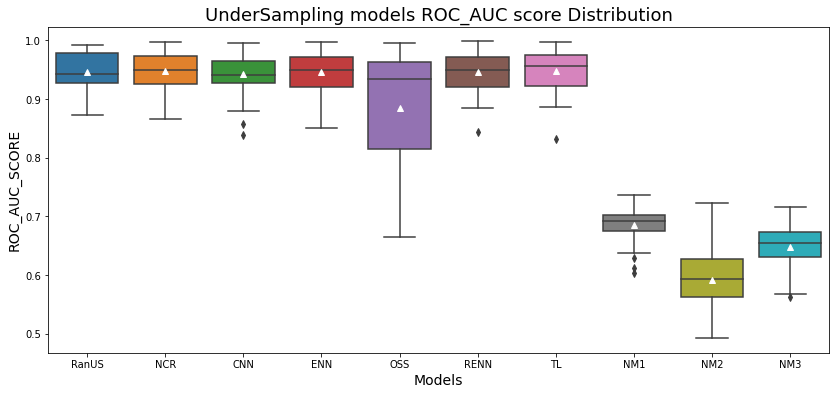

In [49]:
title='UnderSampling'
crossval_boxplot(undersampling_results,us_names,title)

# Combined Sampling

In [50]:
def combinedsampling_models():
    models,names=list(),list()
    
    models.append(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')))
    names.append("SMOTE_TomekLinks")
    
    models.append(SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority')))
    names.append("SMOTE_ENN")
    
    return models,names    

In [51]:
cs_models,cs_names=combinedsampling_models()
combinedsampling_results=list()
for i in range(len(cs_models)):
    pipe=imb_pipe([('s',StandardScaler()),('m',cs_models[i]),('RF',RandomForestClassifier(n_estimators=1000))])
    scores=evaluate_model(X_train,y_train,pipe)
    combinedsampling_results.append(scores)
    print(">>%-20s, Mean ROC_AUC: %.3f, (%.3f)"%(cs_names[i],scores.mean(),scores.std()))

>>SMOTE_TomekLinks    , Mean ROC_AUC: 0.942, (0.038)
>>SMOTE_ENN           , Mean ROC_AUC: 0.942, (0.037)


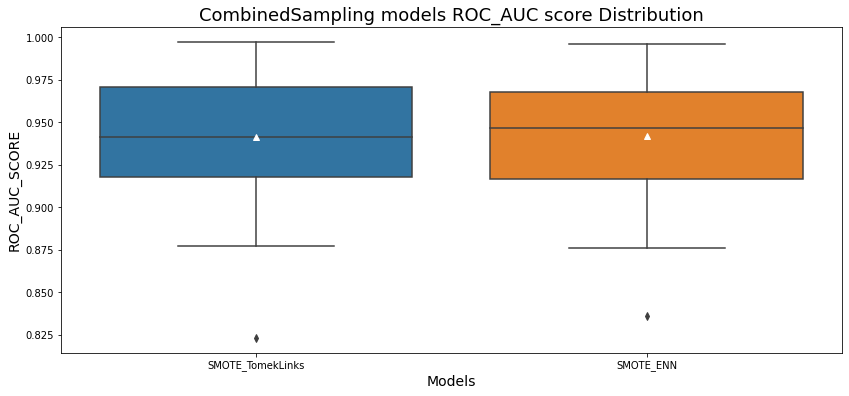

In [52]:
title="CombinedSampling"
crossval_boxplot(combinedsampling_results,cs_names,title)

# ROC Curve

In [53]:
#obtain cross_val_prediction for following models which are top performed
#Balanced_SVC(GridCV_tuned model)
#Imbalanced_RF
#OverSample_SVM_SMOTE
#UnderSample_NCR

#let's set CV=15, cross_validation

#Balanced SVM
svm_pred=cross_val_predict(SVC(C=0.25,gamma='scale',kernel='rbf',class_weight='balanced'),X_train,y_train,cv=15,method="decision_function")

pipe_imbrf=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('imb_rf',BalancedRandomForestClassifier(n_estimators=1000))])
imbrf_pred=cross_val_predict(pipe_imbrf,X_train,y_train,cv=15)
#oversamplig_with+svmsmote
pipe_os_svmsmote=imb_pipe([('s',StandardScaler()),('pt',PowerTransformer()),('os_svmsmote',SVMSMOTE()),('RF',RandomForestClassifier(n_estimators=1000))])
ossvmsmote_pred=cross_val_predict(pipe_os_svmsmote,X_train,y_train,cv=15)
#undersamplig_with+ncr
pipe_us_ncr=imb_pipe([('s',StandardScaler()),('pt',PowerTransformer()),('us_ncr',NeighbourhoodCleaningRule()),('RF',RandomForestClassifier(n_estimators=1000))])
usncr_pred=cross_val_predict(pipe_us_ncr,X_train,y_train,cv=15)


In [54]:
#this area_under the curve does not match with cross_validation roc_auc, because, in cross_validation executed in RepeatedStratifiedKfold harness
#here cv=15
print("SVM Mean ROC_AUC:      %.4f"%(roc_auc_score(y_train, svm_pred)))
print("Balancedrf ROC_AUC:    %.4f"%(roc_auc_score(y_train, imbrf_pred)))
print("SVMSMOTE Mean ROC_AUC: %.4f"%(roc_auc_score(y_train, ossvmsmote_pred)))
print("NCR Mean ROC_AUC:      %.4f"%(roc_auc_score(y_train, usncr_pred)))

SVM Mean ROC_AUC:      0.9456
Balancedrf ROC_AUC:    0.9025
SVMSMOTE Mean ROC_AUC: 0.8630
NCR Mean ROC_AUC:      0.7976


In [55]:
svm_fpr, svm_tpr, svm_thresold = roc_curve(y_train, svm_pred)
imbrf_fpr, imbrf_tpr, imbrf_threshold = roc_curve(y_train, imbrf_pred)
ossvmsmote_fpr, ossvmsmote_tpr, ossvmsmote_threshold = roc_curve(y_train, ossvmsmote_pred)
usncr_fpr, usncr_tpr, usncr_threshold = roc_curve(y_train, usncr_pred)


def plot_roc_curve(*argv):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    #label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine Classifier Score %.4f' % roc_auc_score(y_train, svm_pred))
    plt.plot(imbrf_fpr, imbrf_tpr, label='BalancedRandomForestClassifier Score %.4f' % roc_auc_score(y_train, imbrf_pred))
    plt.plot(ossvmsmote_fpr, ossvmsmote_tpr, label='OverSample_SVMSMOTE Score %.4f' % roc_auc_score(y_train, ossvmsmote_pred))
    plt.plot(usncr_fpr, usncr_tpr, label='UnderSample_NCR Score %.4f' % roc_auc_score(y_train, usncr_pred))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('No Skill ROC CURVE (ROC_AUC=0.5)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
    plt.legend()
    


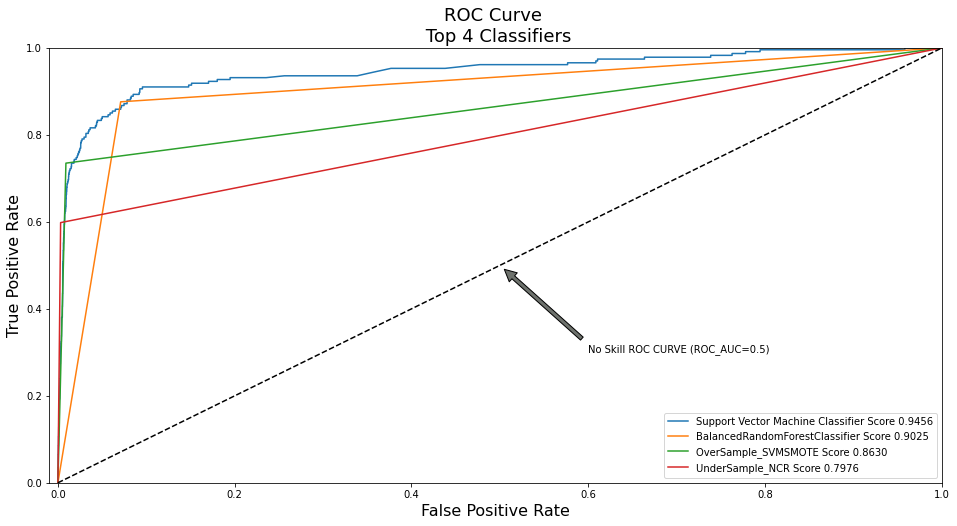

In [56]:
plot_roc_curve(svm_fpr, svm_tpr,imbrf_fpr, imbrf_tpr,ossvmsmote_fpr, ossvmsmote_tpr,usncr_fpr, usncr_tpr)

# Prediction On Unseen Data

In [60]:
#final models, below models top performed in cross_validation test harness

#svm
svm=SVC(C=0.25,gamma='scale',kernel='rbf',class_weight='balanced')
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)


#BalancedRF
pipe_imbrf=Pipeline([('s',StandardScaler()),('pt',PowerTransformer()),('imb_rf',BalancedRandomForestClassifier(n_estimators=1000))])
pipe_imbrf.fit(X_train,y_train)
pipe_imbrf_pred=pipe_imbrf.predict(X_test)


#oversamplig_with+svmsmote
pipe_os_svmsmote=imb_pipe([('s',StandardScaler()),('pt',PowerTransformer()),('os_svmsmote',SVMSMOTE()),('RF',RandomForestClassifier(n_estimators=1000))])
pipe_os_svmsmote.fit(X_train,y_train)
pipe_os_svmsmote_pred=pipe_os_svmsmote.predict(X_test)

#undersamplig_with+ncr
pipe_us_ncr=imb_pipe([('s',StandardScaler()),('pt',PowerTransformer()),('us_ncr',NeighbourhoodCleaningRule()),('RF',RandomForestClassifier(n_estimators=1000))])
pipe_us_ncr.fit(X_train,y_train)
pipe_us_ncr_pred=pipe_us_ncr.predict(X_test)




In [61]:
def heatmap_confusionmatrix(y_true,y_pred,title):
    cmatrix=confusion_matrix(y_true,y_pred)
    perfect_cmatrix=confusion_matrix(y_true,y_true)
    fig, ax = plt.subplots(1,2,figsize=(16,8),sharey=True,)
    #plt.figure(figsize=(16,7));
    
    sns.heatmap(cmatrix,annot=True,xticklabels=['Non-microcalcifications (0)','Microcalcifications (1)'],cmap='OrRd',
                yticklabels=['Non-microcalcifications (0)','Microcalcifications (1)'],ax=ax[0],fmt='d');
    title=title+' Confusion Matrix'
    ax[0].set_title(title);
    ax[0].set_xlabel('Predicted Labels')
    ax[0].set_ylabel('True Labels')
    ax[0].tick_params(axis='y', labelrotation = 0)
    
    sns.heatmap(perfect_cmatrix,annot=True,xticklabels=['Non-microcalcifications (0)','Microcalcifications (1)'],cmap='Greens',
                yticklabels=['Non-microcalcifications (0)','Microcalcifications (1)'],ax=ax[1],fmt='d');
    ax[1].set_title('Perfect Confusion Matrix');
    ax[1].set_xlabel('Predicted Labels')
    ax[1].set_ylabel('True Labels')
    plt.show()

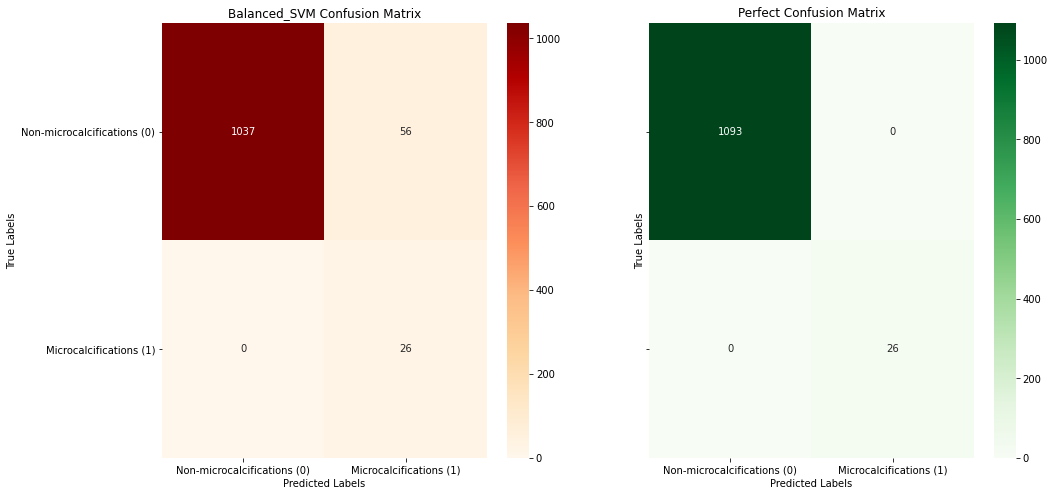

In [62]:
#ConfustionMatrix for Balanced_support_vector_machine
heatmap_confusionmatrix(y_test,svm_pred,title='Balanced_SVM')

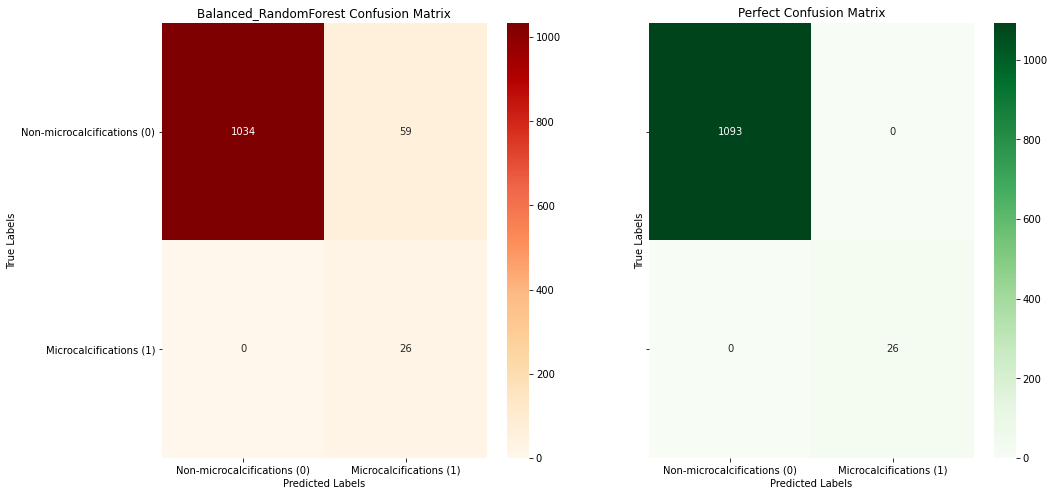

In [63]:
#ConfustionMatrix for Balanced_RandomForest Classifier
heatmap_confusionmatrix(y_test,pipe_imbrf_pred,title='Balanced_RandomForest')

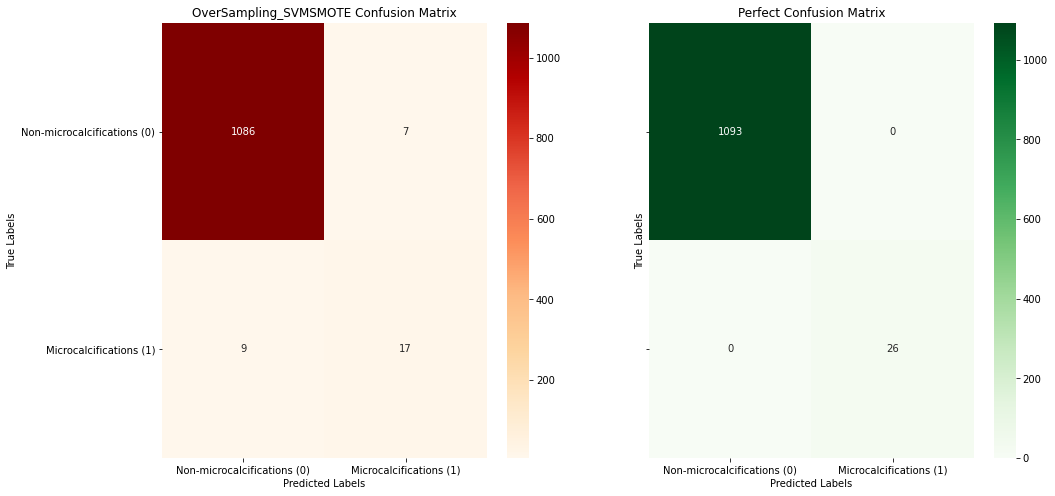

In [64]:
##ConfustionMatrix for OverSampling_SVMSMOTE
heatmap_confusionmatrix(y_test,pipe_os_svmsmote_pred,title='OverSampling_SVMSMOTE')

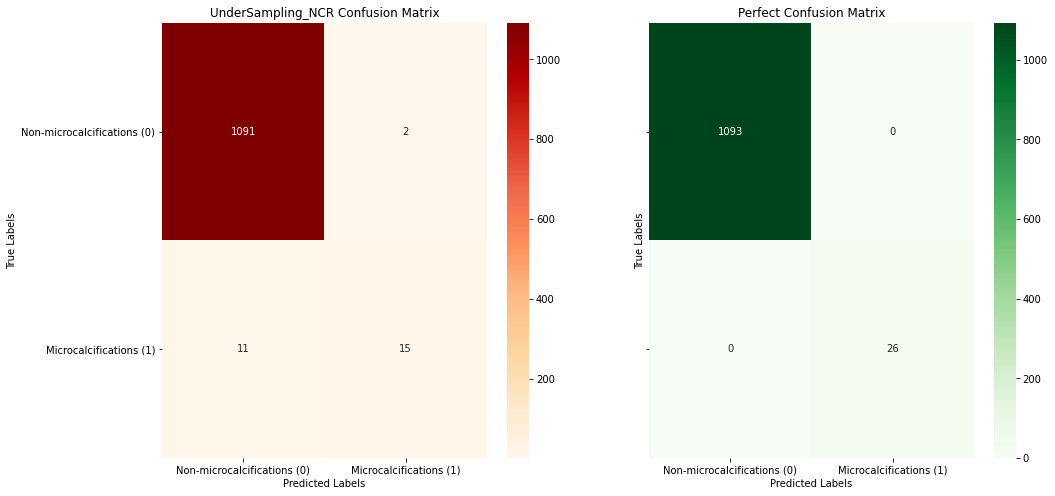

In [65]:
##ConfustionMatrix for UnderSampling_NCR
heatmap_confusionmatrix(y_test,pipe_us_ncr_pred,title='UnderSampling_NCR')

# Observations

'Balanced_SVM' and 'Balanced_RandomForest' models are best performed on unseen data than 'OverSampling_SVMSMOTE','UnderSampling_NCR' models.

'Balanced_SVM' and 'Balanced_RandomForest' models are correctly labeled all the minority classes.

P.S: Neural Network (Deep-Learning) will be performed on this dataset in Next version